In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd() / "_scripts"))

In [85]:
import seaborn as sns
import seaborn.objects as so
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

from helpers.variable_interfaces import all_variables as vars

# from setup.data_wrangle import *
# from setup.materials_setup import *
# from analysis.dataframes import *
# from analysis.volumes import *

from experiments.comparisons import EXP_GROUP
from experiments.retrieve import retrieve_comparison_groups, retrieve_control_cases, get_experiment_folders
from experiments.name_splits import *
# sns.set_style("darkgrid")

from analysis2.all_cases_v_time import create_space_and_site_dfs
from setup.data_wrangle2 import create_wide_dataframe_for_many_qois_and_cases


In [86]:
exp_folders = get_experiment_folders(EXP_GROUP)
[folder] = [i for i in exp_folders if "windows" in i.name]
folder

PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/241120_summer_windows')

In [122]:
cases = retrieve_comparison_groups("windows", EXP_GROUP)
cases

# get_experiment_folders()

[CaseData(case_name='red_b1_0.7', idf=<geomeppy.idf.IDF object at 0x369ee3760>, sql=Energy SQLiteResult: /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/241120_summer_windows/red_b1_0.7/results/eplusout.sql, path_to_input=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/outputs2/case_red_b1'), path_to_output=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/241120_summer_windows/red_b1_0.7')),
 CaseData(case_name='bol_5_0.7', idf=<geomeppy.idf.IDF object at 0x36a43fe80>, sql=Energy SQLiteResult: /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/241120_summer_windows/bol_5_0.7/results/eplusout.sql, path_to_input=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/outputs2/case_bol_5'), path_to_output=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/241120_summer_windows/bol_5_0.7')),
 CaseData(case_name='amb_b1_0.7', idf=<geomeppy.idf.IDF object at 0x36a563a00>, sql=Energy SQLiteRes

In [123]:
df_temp = create_wide_dataframe_for_many_qois_and_cases(cases, [vars.zone.temp["zone_mean_air_temp"]])

df, df_site = create_space_and_site_dfs(cases=cases, space_qois=[vars.afn.zone["vent_vol"], vars.afn.zone["mix_vol"]], site_qois=[vars.site.wind["speed"]])

In [124]:
df_vol = df.join(df_temp, on=["case_names", "space_names", "datetimes"]).with_columns(combined_vent =pl.col("AFN Zone Ventilation Volume [m3]") + pl.col("AFN Zone Mixing Volume [m3]"))
df_vol.head()

case_names,space_names,datetimes,AFN Zone Ventilation Volume [m3],AFN Zone Mixing Volume [m3],time,Zone Mean Air Temperature [C],combined_vent
str,str,datetime[μs],f64,f64,str,f64,f64
"""red_b1_0.7""","""BLOCK 00 STOREY 0""",2017-06-01 00:00:00,0.0,599.486919,"""00:00""",14.611436,599.486919
"""red_b1_0.7""","""BLOCK 00 STOREY 0""",2017-06-01 00:15:00,120.224987,326.260009,"""00:15""",15.29493,446.484997
"""red_b1_0.7""","""BLOCK 00 STOREY 0""",2017-06-01 00:30:00,120.113596,257.130617,"""00:30""",15.639081,377.244213
"""red_b1_0.7""","""BLOCK 00 STOREY 0""",2017-06-01 00:45:00,72.954412,330.069411,"""00:45""",15.960746,403.023823
"""red_b1_0.7""","""BLOCK 00 STOREY 0""",2017-06-01 01:00:00,185.22378,216.328435,"""01:00""",16.095424,401.552215


In [102]:
len(df_vol)

825216

In [125]:
df_agg = df_vol.group_by("case_names").agg([pl.mean("AFN Zone Ventilation Volume [m3]"),
pl.mean("AFN Zone Mixing Volume [m3]"),
pl.mean("combined_vent"), 
pl.mean("Zone Mean Air Temperature [C]")
])


In [126]:
df_agg = split_by_windows(split_by_case_type(df_agg))
df_agg

case_names,AFN Zone Ventilation Volume [m3],AFN Zone Mixing Volume [m3],combined_vent,Zone Mean Air Temperature [C],case_type,exp_type
str,f64,f64,f64,f64,str,str
"""amb_b1_0.7""",92.459128,373.044868,465.503997,19.161852,"""amb""","""-30%"""
"""bol_5_0.7""",317.136949,268.170901,585.307849,19.181117,"""bol""","""-30%"""
"""red_b1_1.3""",453.981301,578.481651,1032.462952,18.683315,"""red""","""+30%"""
"""red_b1_0.7""",281.374942,433.671418,715.04636,18.611117,"""red""","""-30%"""
"""amb_b1_Medium""",118.120114,411.156259,529.276372,19.13361,"""amb""","""Control"""
"""bol_5_Medium""",435.518797,311.353614,746.87241,19.258887,"""bol""","""Control"""
"""bol_5_1.3""",549.593042,341.918068,891.51111,19.346006,"""bol""","""+30%"""
"""amb_b1_1.3""",140.87778,433.779053,574.656832,19.143416,"""amb""","""+30%"""
"""red_b1_Medium""",370.86455,515.112102,885.976652,18.640518,"""red""","""Control"""


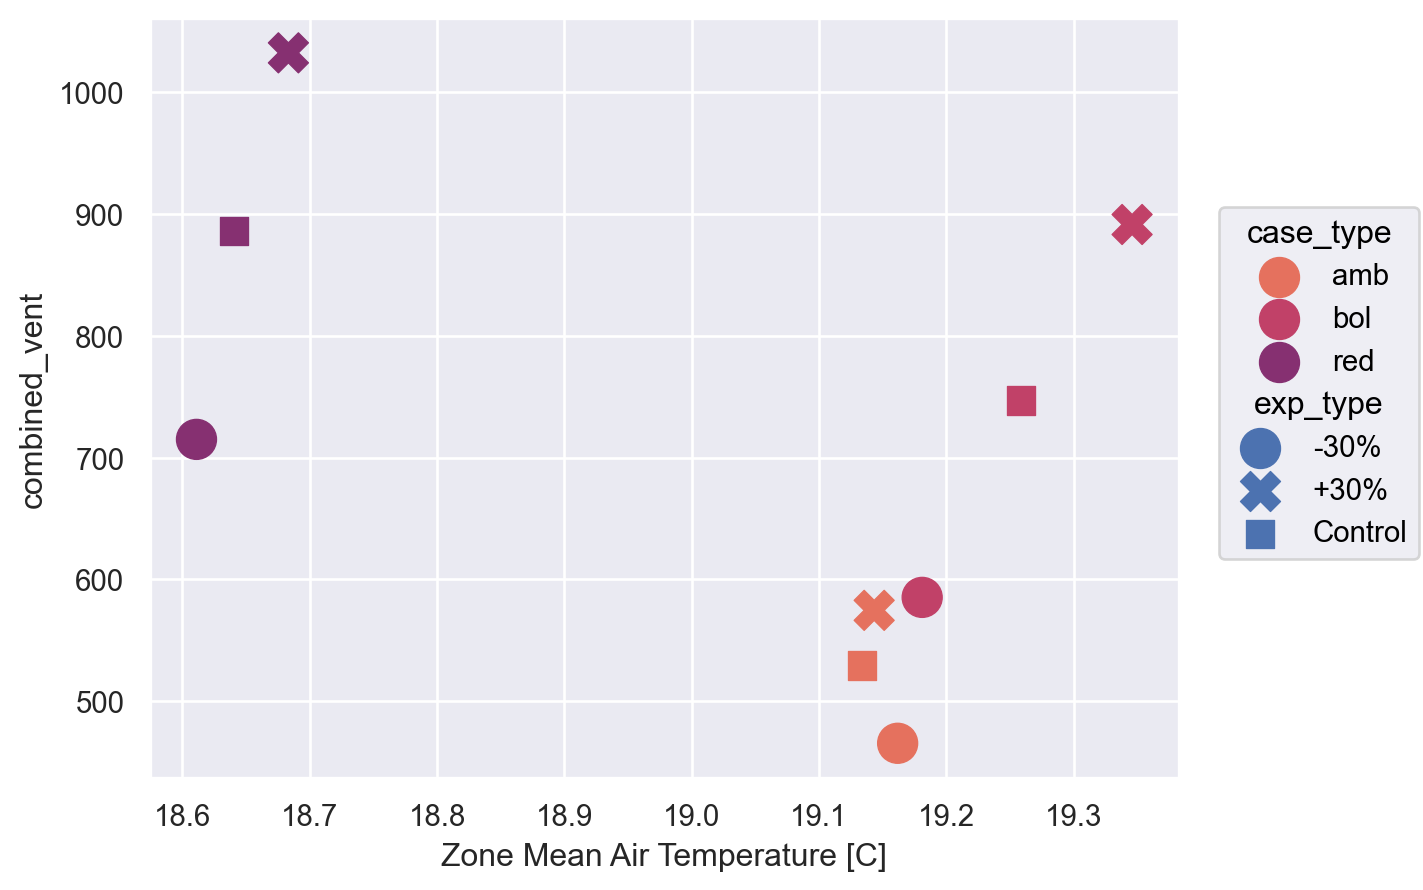

In [127]:
(so.Plot(df_agg, x="Zone Mean Air Temperature [C]", y="combined_vent", color="case_type", marker="exp_type" ).add(so.Dot(pointsize=15)).scale(color="flare").plot())
  

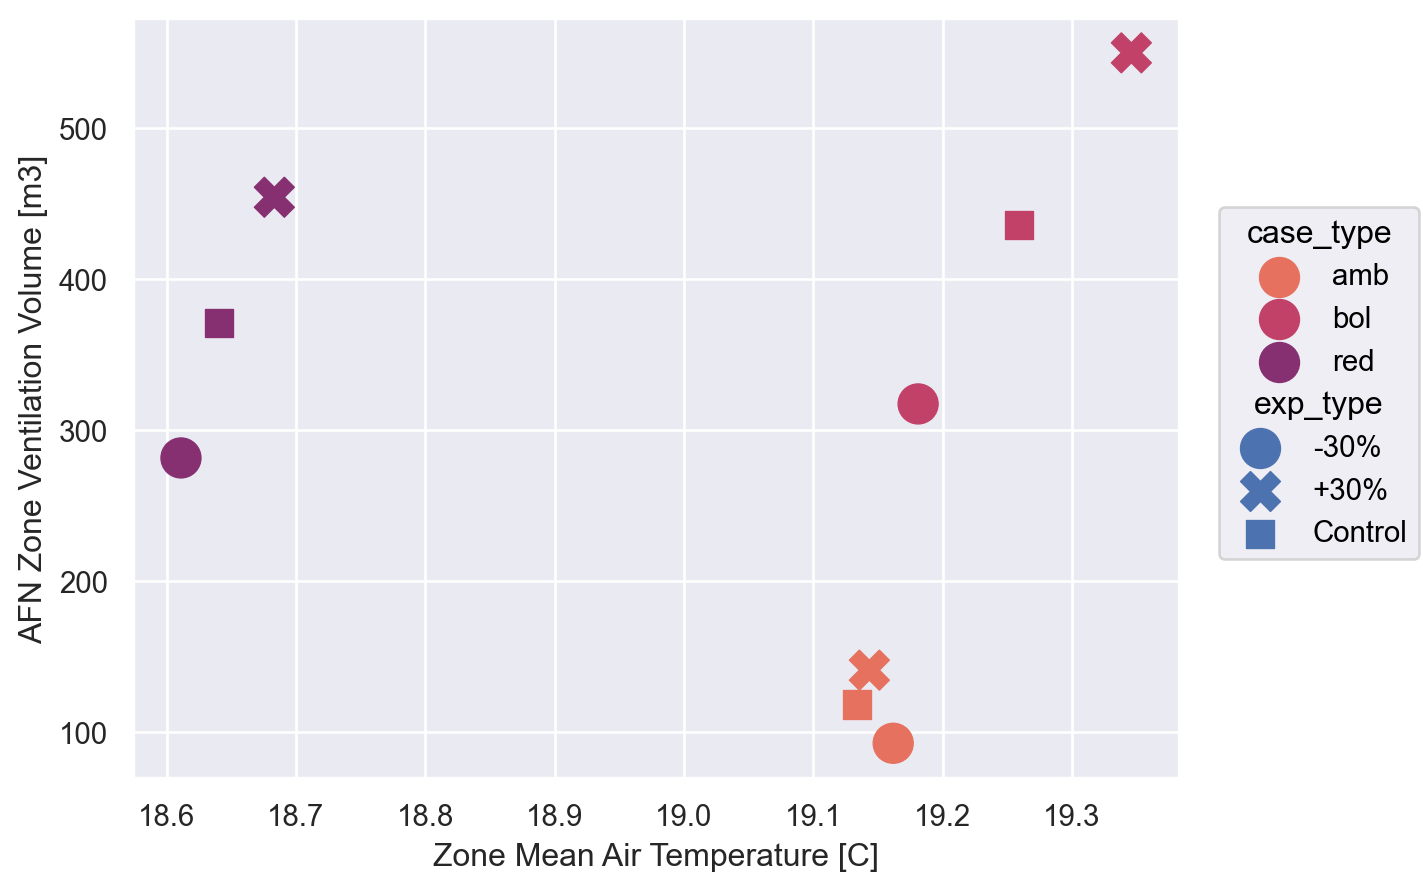

In [128]:
(so.Plot(df_agg, x="Zone Mean Air Temperature [C]", y="AFN Zone Ventilation Volume [m3]", color="case_type", marker="exp_type" ).add(so.Dot(pointsize=15)).scale(color="flare").plot())

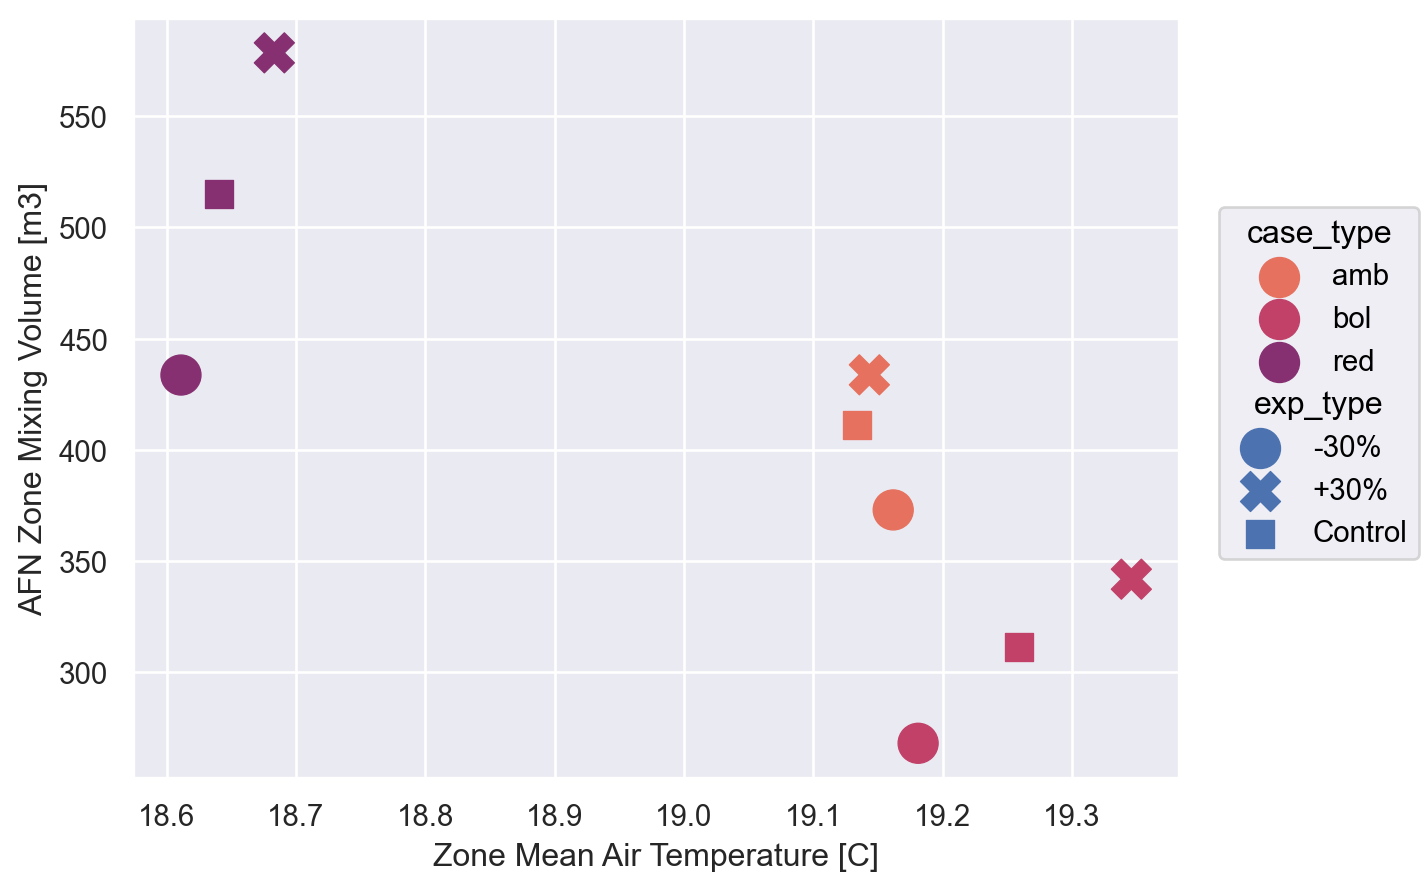

In [129]:
(so.Plot(df_agg, x="Zone Mean Air Temperature [C]", y="AFN Zone Mixing Volume [m3]", color="case_type", marker="exp_type" ).add(so.Dot(pointsize=15)).scale(color="flare").plot())